In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# importing os module
import os
import numpy as np
from PIL import Image
from numpy import asarray
from tensorflow import keras
from tensorflow.keras.preprocessing import image

In [4]:
#Function to convert images to array
def img_to_array(emotion, img_size):
    #first_two = emotion[0:2]
    x = []
    y = []
    #x.append([])
    #x[0].append([])
    folder = "/content/drive/My Drive/archive/emotion/"+emotion
    for count, filename in enumerate(os.listdir(folder)):
        # load the image
        img = Image.open(f"{folder}/{filename}")
        # Resize the image
        img = img.resize((img_size, img_size))
        # asarray() class is used to convert
        # PIL images into NumPy arrays
        img_data = image.img_to_array(img)
        #img_data = img_data.reshape(-1,1)
        #np.append(X, img_data,axis=0)
        x.append(img_data)
        y.append(emotion)
    return x,y

In [5]:
img_size = 48
# Call image to array function to convert all images to array
feature1,target1 = img_to_array("anger", img_size)
feature2,target2 = img_to_array("surprise", img_size)
feature3,target3 = img_to_array("disgust", img_size)
feature4,target4 = img_to_array("fear", img_size)
feature5,target5 = img_to_array("happiness", img_size)
feature6,target6 = img_to_array("neutrality", img_size)
feature7,target7 = img_to_array("sadness", img_size)



In [6]:
# Combine all features into one list
feature = feature1 + feature2 + feature3 + feature4 + feature5 + feature6 + feature7
# Transforms the list into a numpy array
feature_arr = np.array(feature)

# Combine all targets into one list
target = target1 + target2 + target3 + target4 + target5 + target6 + target7
# Transforms the list into a numpy array
target_arr = np.array(target)
# Check the shape of the array
print(f"{feature_arr.shape} \n {target_arr.shape}")

(28784, 48, 48, 1) 
 (28784,)


In [7]:
# Tranfer the arrays to coresponding variables
X = feature_arr
y= target_arr

In [8]:
# Dependencies to Visualise the model
%matplotlib inline
from IPython.display import Image, SVG
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(0)
import tensorflow as tf
# Sklearn
from sklearn.model_selection import train_test_split
# Sklearn scaling
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
# Keras
from tensorflow import keras
# import keras_tuner as kt
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, AveragePooling2D, BatchNormalization
from keras.metrics import top_k_categorical_accuracy
tf.config.run_functions_eagerly(True)
tf.data.experimental.enable_debug_mode()

In [9]:
# Use sklearn to split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=43)

# Check the shape of traing data
print(f"{X_train.shape} \n {y_train.shape}")

(21588, 48, 48, 1) 
 (21588,)


In [10]:
# building the input vector from the 28x28 pixels
X_train = X_train.reshape(X_train.shape[0], img_size, img_size,1)
X_test = X_test.reshape(X_test.shape[0], img_size, img_size,1)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# normalizing the data to help with the training
X_train /= 255
X_test /= 255

print(f"{X_train.shape} \n {y_train.shape}")
y_train[:20]


(21588, 48, 48, 1) 
 (21588,)


array(['fear', 'happiness', 'neutrality', 'happiness', 'happiness',
       'neutrality', 'surprise', 'neutrality', 'happiness', 'happiness',
       'fear', 'fear', 'neutrality', 'fear', 'fear', 'happiness',
       'sadness', 'neutrality', 'neutrality', 'happiness'], dtype='<U10')

In [11]:
# Change target catagorieslabels to numaeric categories using LabelEncoder
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.fit_transform(y_test)
classes = le.classes_
classes

array(['anger', 'disgust', 'fear', 'happiness', 'neutrality', 'sadness',
       'surprise'], dtype='<U10')

In [12]:
# We need to convert our target labels (expected values) to categorical data
num_classes = len(classes)
y_train = to_categorical(y_train_encoded, num_classes)
y_test = to_categorical(y_test_encoded, num_classes)

y_train[0]

array([0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [13]:
X_train.shape

(21588, 48, 48, 1)

In [14]:
y_train

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [15]:
from tensorflow.keras import regularizers

In [16]:
# Change model Compile Matrix top_k_categorical_accuracy top-5 to top-2
inTop2 = lambda x, y: top_k_categorical_accuracy(x, y, k=2)

#kernel_regularizer=regularizers.L1L2(l1=1e-5, l2=1e-4)
input_shape = X_train[0].shape
activ = 'swish'

In [48]:
cnn6 = Sequential()
cnn6.add(Conv2D(32, kernel_size=(4, 4), activation= activ, input_shape=input_shape))
cnn6.add(BatchNormalization())
cnn6.add(Dropout(0.25))

cnn6.add(Conv2D(32, kernel_size=(4, 4), activation=activ))
cnn6.add(BatchNormalization())
cnn6.add(AveragePooling2D(pool_size=(2, 2)))
cnn6.add(Dropout(0.25))

cnn6.add(Conv2D(64, kernel_size=(3, 3), activation=activ))
cnn6.add(BatchNormalization())
cnn6.add(Dropout(0.25))

cnn6.add(Conv2D(64, kernel_size=(3, 3), activation=activ))
cnn6.add(BatchNormalization())
cnn6.add(AveragePooling2D(pool_size=(2, 2)))
cnn6.add(Dropout(0.25))

cnn6.add(Conv2D(128, kernel_size=(2, 2), activation=activ))
cnn6.add(BatchNormalization())
cnn6.add(Dropout(0.25))

cnn6.add(Conv2D(128, kernel_size=(2, 2), activation=activ))
cnn6.add(BatchNormalization())
cnn6.add(AveragePooling2D(pool_size=(2, 2)))
cnn6.add(Dropout(0.25))

cnn6.add(Flatten())

cnn6.add(Dense(512, activation=activ))
cnn6.add(BatchNormalization())
cnn6.add(Dropout(0.5))

cnn6.add(Dense(128, activation=activ))
cnn6.add(BatchNormalization())
cnn6.add(Dropout(0.5))

cnn6.add(Dense(7, activation='softmax'))

cnn6.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [49]:
cnn6.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 45, 45, 32)        544       
                                                                 
 batch_normalization_8 (Batc  (None, 45, 45, 32)       128       
 hNormalization)                                                 
                                                                 
 dropout_8 (Dropout)         (None, 45, 45, 32)        0         
                                                                 
 conv2d_7 (Conv2D)           (None, 42, 42, 32)        16416     
                                                                 
 batch_normalization_9 (Batc  (None, 42, 42, 32)       128       
 hNormalization)                                                 
                                                                 
 average_pooling2d_3 (Averag  (None, 21, 21, 32)      

In [51]:
# training the model for 10 epochs
cnn6.fit(X_train, y_train, batch_size=64, epochs=29, validation_data=(X_test, y_test))

Epoch 1/29
338/338 [==============================] - 249s 737ms/step - loss: 2.1211 - accuracy: 0.2692 - val_loss: 1.7968 - val_accuracy: 0.2504
Epoch 2/29
338/338 [==============================] - 248s 734ms/step - loss: 1.6973 - accuracy: 0.3594 - val_loss: 1.6458 - val_accuracy: 0.3645
Epoch 3/29
338/338 [==============================] - 247s 730ms/step - loss: 1.5278 - accuracy: 0.4164 - val_loss: 1.4331 - val_accuracy: 0.4387
Epoch 4/29
338/338 [==============================] - 247s 732ms/step - loss: 1.4290 - accuracy: 0.4527 - val_loss: 1.3421 - val_accuracy: 0.4807
Epoch 5/29
338/338 [==============================] - 250s 739ms/step - loss: 1.3524 - accuracy: 0.4815 - val_loss: 1.3209 - val_accuracy: 0.4868
Epoch 6/29
338/338 [==============================] - 246s 728ms/step - loss: 1.3007 - accuracy: 0.5044 - val_loss: 1.2700 - val_accuracy: 0.5122
Epoch 7/29
338/338 [==============================] - 247s 730ms/step - loss: 1.2583 - accuracy: 0.5208 - val_loss: 1.2378 -

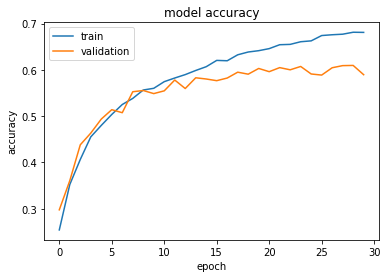

In [20]:
#  "Accuracy"
plt.plot(cnn6.history.history['accuracy'])
plt.plot(cnn6.history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


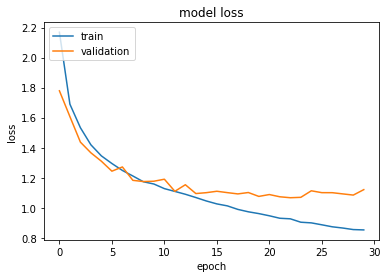

In [21]:
# "Loss"
plt.plot(cnn6.history.history['loss'])
plt.plot(cnn6.history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

## Saving and Loading models

We can save our trained models using the HDF5 binary format with the extension `.h5`

In [24]:
# Save the model
cnn6.save("emotion_model.h5")

In [41]:
# Load the model
from tensorflow.keras.models import load_model
#model = load_model("/content/drive/My Drive/cnn2D65.h5",  custom_objects={"lr_track": lr_track })
model = load_model("emotion_model.h5",  compile=False)

## Evaluating the Model

We use our testing data to validate our model. This is how we determine the validity of our model (i.e. the ability to predict new and previously unseen data points)

In [42]:
# Evaluate the model using the training data 
model_loss, model_accuracy = cnn6.evaluate(X_test, y_test, verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

225/225 - 19s - loss: 1.1205 - accuracy: 0.5896 - 19s/epoch - 83ms/step
Loss: 1.120548963546753, Accuracy: 0.5896331071853638


## Making Predictions

We can use our trained model to make predictions using `model.predict`

In [43]:
# Define default image size for our model
#image_path = os.path.join("Images", "happy.jpeg")
image_path = "/content/drive/My Drive/happy.jpeg"
image_size = (img_size, img_size, 1)

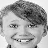

In [44]:
from tensorflow.keras.preprocessing import image
im = image.load_img(image_path, target_size=image_size, color_mode="grayscale")
im

In [45]:
# Convert the image to a numpy array 
from tensorflow.keras.preprocessing.image import img_to_array
image = img_to_array(im)
image.shape

(48, 48, 1)

In [46]:
# Scale the image pixels by 255 (or use a scaler from sklearn here)
image/= 255

# Reshape
img = image.reshape(1, img_size, img_size, 1)
img.shape

(1, 48, 48, 1)

In [47]:
# Make a prediction. The result should be 0000010000000 for a 5
model.predict(img).round()

1/1 [==============================] - 0s 30ms/step


array([[0., 0., 0., 1., 0., 0., 0.]], dtype=float32)